In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data set

In [3]:
articles = pd.read_csv("data/articles.csv")
customers = pd.read_csv("data/customers.csv")
submission = pd.read_csv("data/sample_submission.csv")
transactions = pd.read_csv("data/transactions_train.csv", parse_dates=["t_dat"])

In [4]:
transactions.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [5]:
{
    "product_counts": transactions["article_id"].nunique(),
    "avg_price": transactions["price"].mean(),
}

{'product_counts': 104547, 'avg_price': 0.027829273856993582}

# Aggregated article sales over time

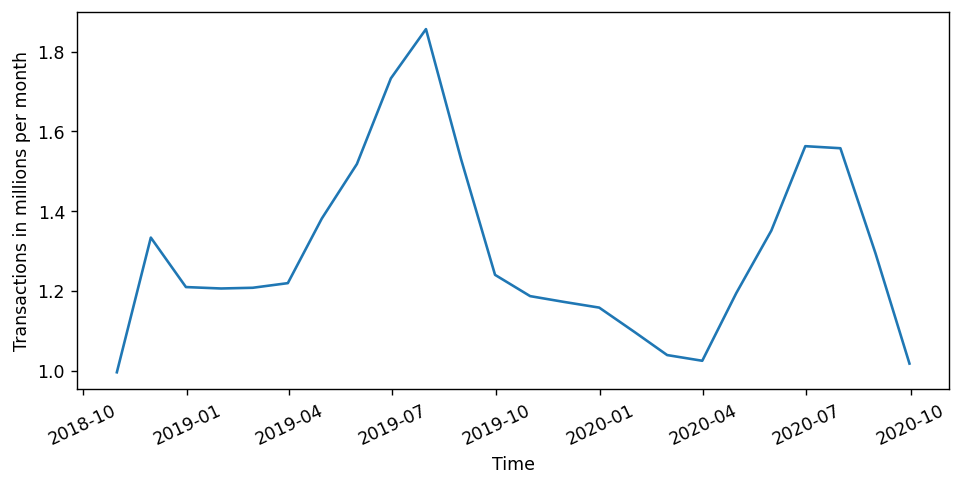

In [6]:
# time series
ts  = transactions.resample('1M', on='t_dat').size()
# time series moving avg
ma = ts.rolling(2).mean() / 1000000

fig, ax = plt.subplots(dpi=125, figsize=[9,4])
sns.lineplot(data=ma)
plt.xticks(rotation = 25);
plt.xlabel("Time")
plt.ylabel("Transactions in millions per month");

It really looks like H&M sells more during summer than other periods. However, the decrease in sales (compare summer 2019 to summer 2020) might be due to the Covid pandemic, where customers might have prefered online-shopping rather than retail.

# Aggregated revenue over time

In [7]:
{
    'minimum price':transactions.price.min().round(2), 
    'maximum price':transactions.price.max().round(2), 
    'mean price':transactions.price.mean().round(2), 
    'std.dev price':transactions.price.std().round(2),
}

{'minimum price': 0.0,
 'maximum price': 0.59,
 'mean price': 0.03,
 'std.dev price': 0.02}

The price is normalized in some way, however an aggregation of price is still sensible

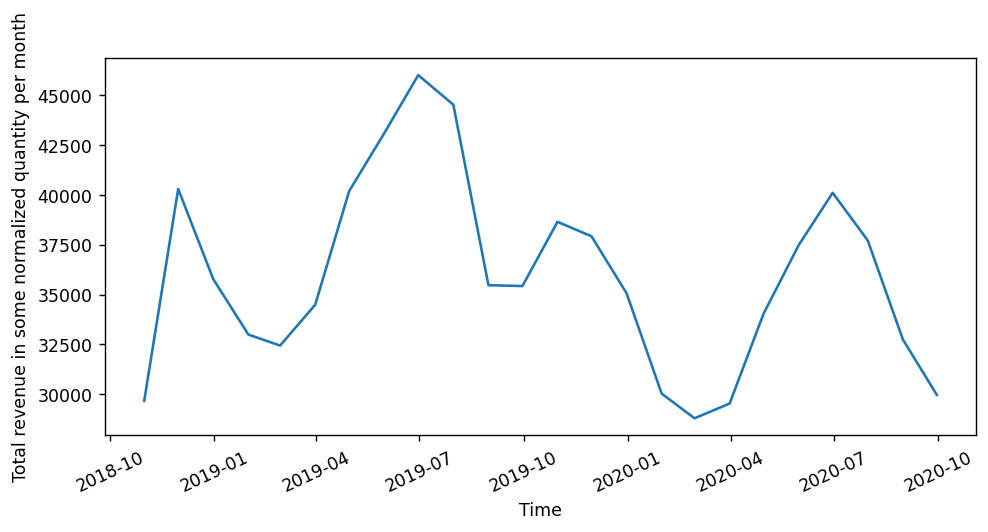

In [8]:
ts  = transactions.resample('1M', on='t_dat').price.sum()
ma = ts.rolling(2).mean()

fig, ax = plt.subplots(dpi=125, figsize=[9,4])
sns.lineplot(data=ma)
plt.xticks(rotation = 25);
plt.xlabel("Time")
plt.ylabel("Total revenue in some normalized quantity per month");

The total revenue follows the same trend as the number of articles. However one could visualize the mean revenue per article over time to see if customers buy in one season over other seasons.

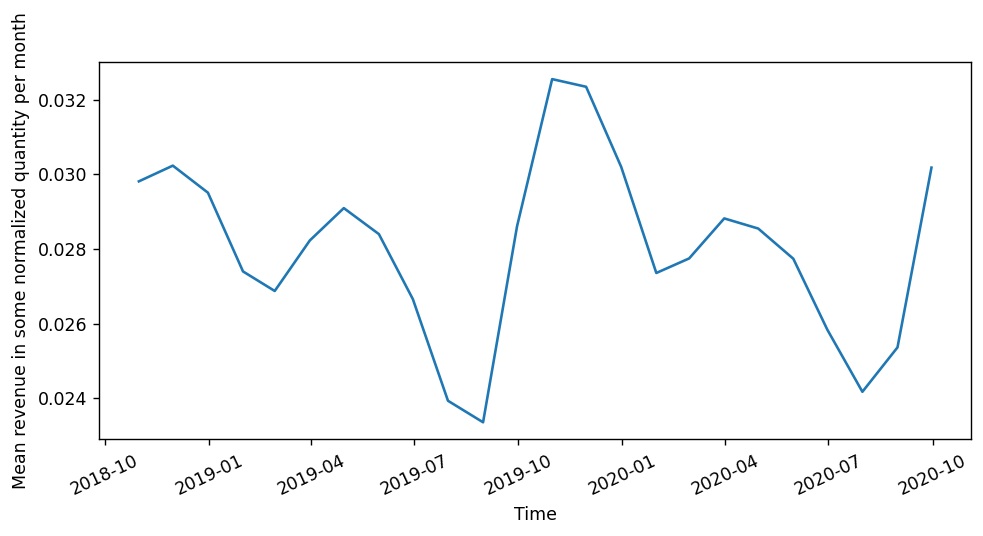

In [9]:
ts  = transactions.resample('1M', on='t_dat').price.mean()
ma = ts.rolling(2).mean()

fig, ax = plt.subplots(dpi=125, figsize=[9,4])
sns.lineplot(data=ma)
plt.xticks(rotation = 25);
plt.xlabel("Time")
plt.ylabel("Mean revenue in some normalized quantity per month");

The graph indicates that customers might tend to buy more expensive articles in christmas time.

# Customers

In [10]:
customers.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [11]:
{
    'CustomerCount':customers["customer_id"].nunique(),
    'FNCount': customers["FN"].where(lambda x: x==1).sum(),
    'ActiveCount': customers["Active"].where(lambda x: x==1).sum(),
    'AgeMean': customers["age"].mean(),
    'PostalCount': customers["postal_code"].nunique()
}

{'CustomerCount': 1371980,
 'FNCount': 476930.0,
 'ActiveCount': 464404.0,
 'AgeMean': 36.386964565794,
 'PostalCount': 352899}

Simple stats show that its a really big customer base (ofc its H&M). The average age on 36 years is also interesting, and one could plot the observed age distribution.

Text(0, 0.5, 'Number of customers')

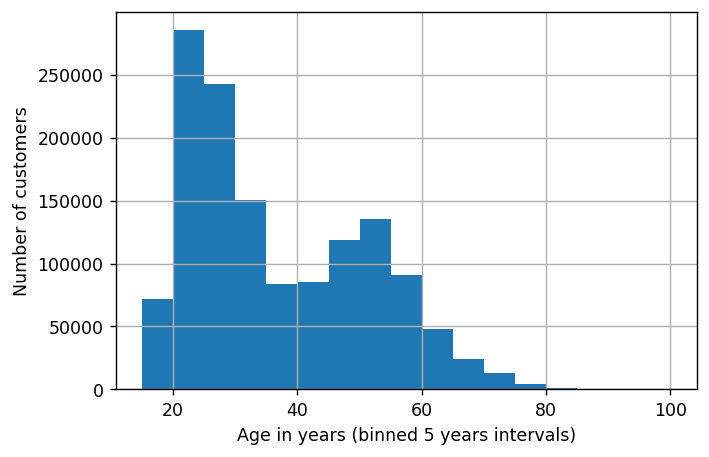

In [12]:
fig, ax = plt.subplots(dpi=125)
customers["age"].hist(bins=range(15,105,5));
plt.xlabel("Age in years (binned 5 years intervals)")
plt.ylabel("Number of customers")

So even though the mean age is 36, the customers are more represented by young and middle aged customers. Thus it's a multimodal age distribution

# purchase counts are some types of customers better than others?

In [13]:
transactions["customer_id"].value_counts()

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
                                                                    ... 
63b70b71291668f0a63ade8e321fb3eccb80eba164f2087dad471de065f18e1f       1
950b172c36d169bf427545991fe66371f21a085799b44780fdcb2da6a3091613       1
7c284f13f4af9d6a53f97279381638ed0cb7afaa4fd4f3eaadc21993ea45fc69       1
62d49d0ae11a4f65fa31e354cb87f6b557ebec648e0e5e71435d2dd190d1ccc4       1
268eaa31a07d6f2f4f060bfcf32a660f3ea3dbb21ef14cd09fc2545f4e0b5c10       1
Name: customer_id, Length: 1362281, dtype: int64

Some customers buy up to 1895 articles in the time period. Is it an error or just a really rich person??

In [14]:
evaluate_customers = transactions\
    .groupby("customer_id", as_index=False)\
    .agg(
        purchase_count=("article_id", len),
        purchase_total=("price", "sum"),
        purchase_mean=("price", "mean"),
    
    )\
    .merge(customers[["customer_id", "age"]], on = 'customer_id')

Well the data is over a 2 year time period, however customer_id has a static age, which should be a dynamic feature.

## Visualize customer segments

Text(0.5, 0, 'Age')

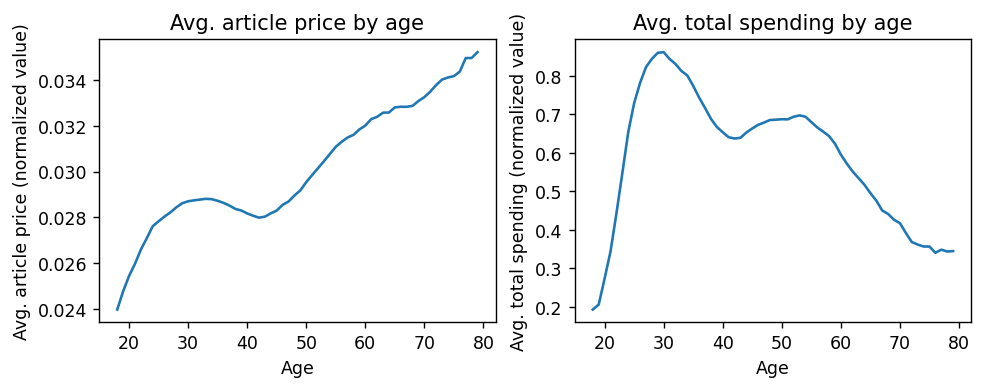

In [15]:
fig, (ax1, ax2)=plt.subplots(dpi=125, ncols=2, figsize=[9,3])
avg_purchase_by_age=evaluate_customers.groupby("age").purchase_mean.mean().rolling(3).mean()
sns.lineplot(data=avg_purchase_by_age.where(lambda x: x.index<80), ax=ax1)
ax1.set_title("Avg. article price by age")
ax1.set_ylabel("Avg. article price (normalized value)")
ax1.set_xlabel("Age")

avg_purchase_by_age=evaluate_customers.groupby("age").purchase_total.mean().rolling(3).mean()
sns.lineplot(data=avg_purchase_by_age.where(lambda x: x.index<80), ax=ax2)
ax2.set_title("Avg. total spending by age")
ax2.set_ylabel("Avg. total spending (normalized value)")
ax2.set_xlabel("Age")

Before we found out that the customer base is primarily young people (20-30 years old) and middle aged people (45-60 years old). The plot shows that an avg. young person spend the most money however the avg. middle aged person buys fewer articles, but more expensive.

# follow 10 random customers journey

In [16]:
customerid = customers.sample(10)["customer_id"]
journey = transactions.loc[lambda x: x["customer_id"].isin(customerid)].reset_index(drop=True)
origin=journey["t_dat"].min()

In [17]:
journey["age"] = customers.loc[lambda x: x["customer_id"].isin(customerid)]["age"].iloc[0]
journey["time_as_int"]=(journey["t_dat"]- origin ).dt.days
codes, uniques = pd.factorize(journey["customer_id"])

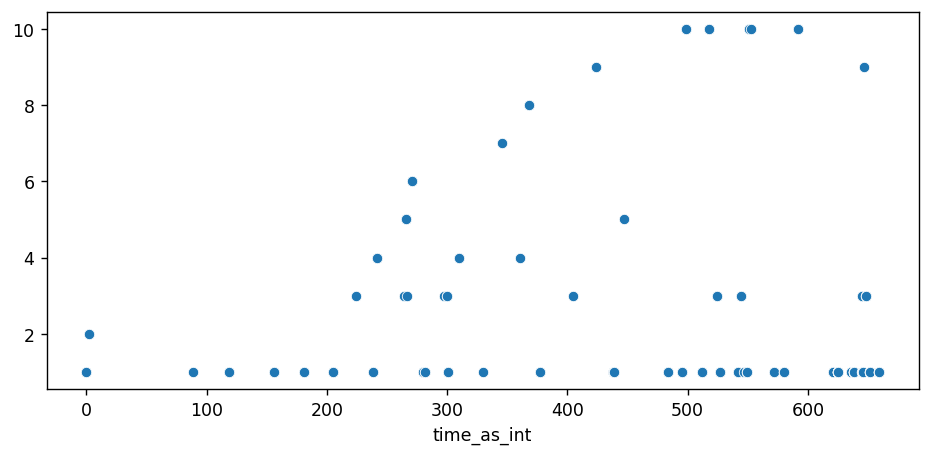

In [18]:
fig,ax=plt.subplots(dpi=125, figsize=(9,4))
sns.scatterplot(x=journey["time_as_int"], y=codes+1);

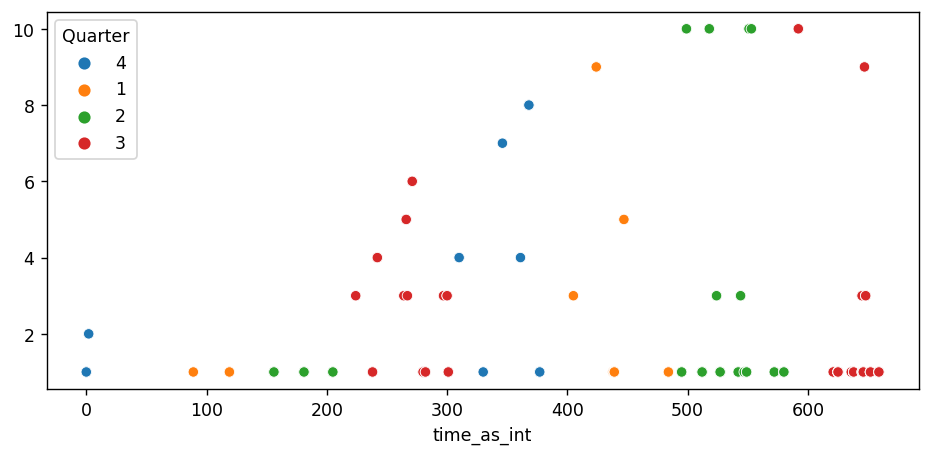

In [19]:
import numpy as np
quarter = np.ceil(journey["t_dat"].dt.month.divide(3)).astype(int).astype(str).rename("Quarter")

fig,ax=plt.subplots(dpi=125, figsize=(9,4))
sns.scatterplot(x=journey["time_as_int"], y=codes+1, hue=quarter);

# Product life cycle

In [82]:
pd.concat(
    [
        transactions.where(lambda x: x.article_id == 685687003).resample('1M', on='t_dat').size().rename('685687003'), 
        transactions.where(lambda x: x.article_id == 833459002).resample('1M', on='t_dat').size().rename('833459002'),
    ], axis = 1
).fillna(0).astype(int)


,685687003,833459002
t_dat,,
2018-09-30,1243,0
2018-10-31,402,0
2018-11-30,159,0
2018-12-31,23,0
2019-01-31,3,0
2019-02-28,0,0
2019-03-31,0,0
2019-04-30,1,0
2019-05-31,2,0


Looks like products has a life cycle and is only sold in some years/ seasons. Maybe they are not in stock or the fashion changes, which is very natural